In [15]:
%load_ext autoreload 
%autoreload 2
from typing import Tuple
from pathlib import Path  # used for common file system operations
import pandas as pd  # enables working with dataframes
import matplotlib.pyplot as plt  # a standard plotting package for python
import seaborn as sns  # extra tools for plotting (such as violin plots)
import numpy as np  # common mathematical functions
from age_balance_analysis.symbolic import SymbolicAgeBalanceAnalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
aba = SymbolicAgeBalanceAnalysis(2, 3)

aba.set_param_bounds(0, 0, 100)
aba.set_param_bounds(1, 0, 100)
aba.set_param_bounds(2, 0, 100)

aba.set_coeff(0, 0, -aba.get_params(0))
aba.set_coeff(1, 0, aba.get_params(1))
aba.set_coeff(1, 1, -aba.get_params(1) - aba.get_params(2))

In [17]:
display(aba.get_contributed_turnover_matrix())

Matrix([
[-p_0,          0],
[ p_1, -p_1 - p_2]])

In [18]:
display(aba.display_bounds())

[(0.0 <= p_0, p_0 <= 100.0),
 (0.0 <= p_1, p_1 <= 100.0),
 (0.0 <= p_2, p_2 <= 100.0)]

In [19]:
DATA_PATH = Path("../data/lysine_vacule_knockouts")
METABOLIC_LABELLING_DATA_PATH = DATA_PATH / "2024-02-28_MS_metabolites_EO_1.tsv"
labelling_df = pd.read_csv(METABOLIC_LABELLING_DATA_PATH, delimiter="\t")
labelling_df["time_h"] = labelling_df.time_min / 60.0
total_soluble_df = labelling_df[labelling_df.fraction == "total soluble"]
data_mean = total_soluble_df.groupby("time_h")[["labelling"]].mean().reset_index()
tdata = data_mean.time_h.values  # experimental data time series
ydata = data_mean.labelling.values  # experimental data labelling series

popt, pcov, mse = aba.fit(tdata, ydata)
print(aba.get_solution_M(popt))

[[ -0.76420411   0.        ]
 [  4.99405203 -19.26242589]]


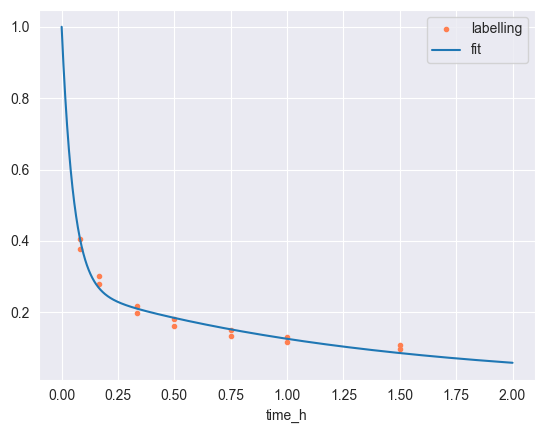

In [20]:

fig, ax = plt.subplots()
total_soluble_df.plot(x="time_h", y="labelling", ax=ax, style='.', color="coral")

t_range = np.linspace(0, 2, 1000)
f = aba.get_f_lambda(popt)
ax.plot(t_range, [f(t) for t in t_range], '-', label="fit")
ax.legend();